In [2]:
import pandas as pd

#### Load Data

In [14]:
customer_df = pd.read_excel("Bank_Churn_Messy.xlsx", sheet_name = "Customer_Info")
account_df = pd.read_excel("Bank_Churn_Messy.xlsx", sheet_name = "Account_Info")


                           

#### Merge

In [13]:
print(customer_df.columns)
print(account_df.columns)


Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary'],
      dtype='object')
Index(['CustomerId', 'Balance', 'NumOfProducts', 'HasCrCard', 'Tenure',
       'IsActiveMember', 'Exited'],
      dtype='object')


In [15]:
df = pd.merge(customer_df, account_df, on="CustomerId", how="inner")

In [17]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


#### Cleaning

In [18]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


(10004, 14)

In [19]:
df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure_x           0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_y           0
IsActiveMember     0
Exited             0
dtype: int64

In [21]:
df = df[df['Surname'].notnull()]


In [24]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

In [27]:
print(df.columns)

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')


In [28]:
df.isnull().sum()     
df.info()             
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 10001 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
 8   Balance          10001 non-null  object 
 9   NumOfProducts    10001 non-null  int64  
 10  HasCrCard        10001 non-null  object 
 11  IsActiveMember   10001 non-null  object 
 12  Exited           10001 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


(10001, 13)

In [29]:
df.to_excel("Cleaned_Bank_Churn_Data.xlsx", index=False)


In [30]:
import os
os.getcwd()


"C:\\Users\\Dell Latitude\\Downloads\\Jennifer's Assignment (Data Analysis For Python)"

#### Churn Overview

In [31]:
# Count total and exited customers
print(df['Exited'].value_counts())

Exited
0    7963
1    2038
Name: count, dtype: int64


In [32]:
# Percentage churn
churn_rate = df['Exited'].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 20.38%


#### Gender and Geography Distribution

In [33]:
# Gender distribution
print(df['Gender'].value_counts())

Gender
Male      5456
Female    4545
Name: count, dtype: int64


In [34]:
# Geography distribution
print(df['Geography'].value_counts())

Geography
Germany    2508
Spain      2476
France     1740
French     1658
FRA        1619
Name: count, dtype: int64


#### Average Financial Metrics

In [61]:
# Average Financial Metrics grouped by churn status 
df.groupby('Exited')[['CreditScore', 'Balance', 'EstimatedSalary']].mean()

,CreditScore,Balance,EstimatedSalary
Exited,,,
0,651.927289,0.0,0.0
1,645.338567,0.0,0.0


In [59]:
df[['Balance', 'EstimatedSalary']].head(10)

,Balance,EstimatedSalary
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [60]:
df['Balance'].unique()[:10]
df['EstimatedSalary'].unique()[:10]

array([0], dtype=int64)

In [62]:
# Note: Due to zeroed data, financial metrics (Balance and EstimatedSalary) will be excluded from this analysis.

#### Tenure, Products & Activity

In [36]:
# Tenure vs Churn
print(df.groupby('Exited')['Tenure'].mean())

Exited
0    5.033404
1    4.931305
Name: Tenure, dtype: float64


In [37]:
# Number of Products vs Churn
print(df.groupby('Exited')['NumOfProducts'].mean())

Exited
0    1.544267
1    1.474975
Name: NumOfProducts, dtype: float64


In [38]:
# IsActiveMember vs Churn
print(df.groupby('IsActiveMember')['Exited'].value_counts(normalize=True) * 100)

IsActiveMember  Exited
No              0         73.160173
                1         26.839827
Yes             0         85.708738
                1         14.291262
Name: proportion, dtype: float64


#### Churn Analysis Based on Demographics & Engagement

#### 1. What does churn rate look like?

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

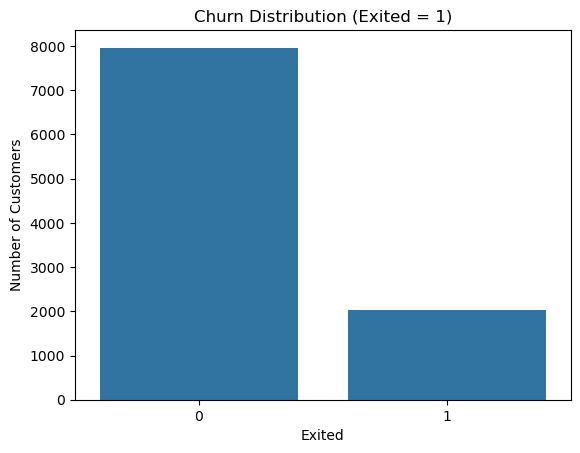

In [64]:
# Churn distribution
sns.countplot(data=df, x='Exited')
plt.title('Churn Distribution (Exited = 1)')
plt.xlabel('Exited')
plt.ylabel('Number of Customers')
plt.show()

#### 2. How is churn distributed across gender?

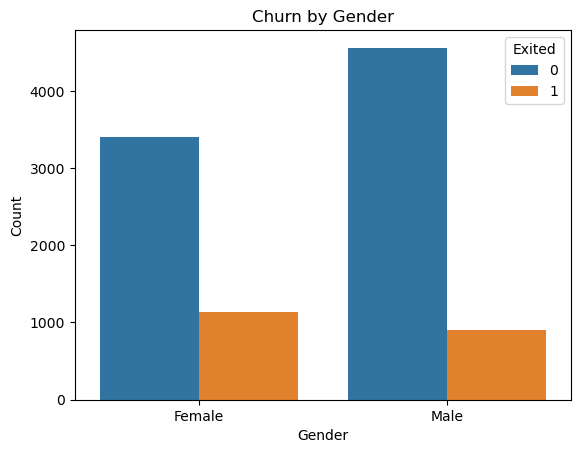

In [66]:
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### 3. What’s the average credit score and age by churn status?

In [67]:
df.groupby('Exited')[['CreditScore', 'Age']].mean()

,CreditScore,Age
Exited,,
0,651.927289,37.404621
1,645.338567,44.836605


#### 4. What regions have higher churn?

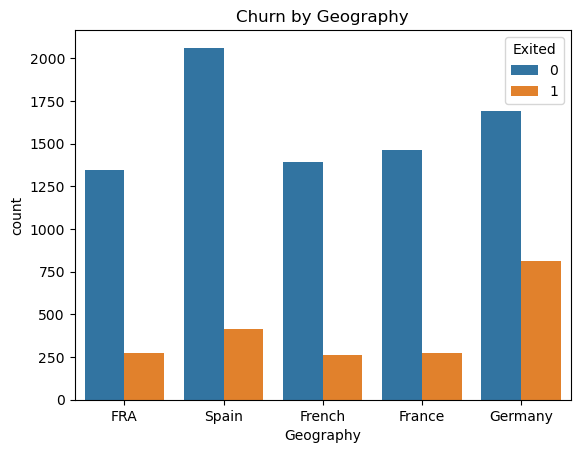

In [68]:
sns.countplot(data=df, x='Geography', hue='Exited')
plt.title('Churn by Geography')
plt.show()

#### 5. Are customers with more products likely to churn?

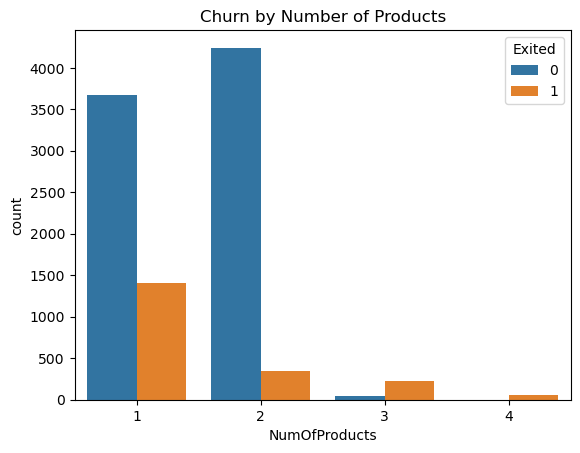

In [69]:
sns.countplot(data=df, x='NumOfProducts', hue='Exited')
plt.title('Churn by Number of Products')
plt.show()

#### Insights and Observations

#### 1. Churn Rate
About 20% of customers have exited, while 80% remain. Which suggests a moderate churn rate and highlights a need to investigate retention factors.

#### 2. Gender and Churn
Both male and female customers leave at similar rates. Which suggests that gender may not be a strong driver of churn by itself.

#### 3. Credit Score & Age by Churn
Exited customers have a slightly lower average credit score.

They are also older on average compared to customers who stayed. Which means age may play a role in churn. Older customers might leave more.

#### 4. Geography and Churn
Customers from Germany have the highest churn rate.

Customers from France and Spain are more likely to stay.
Regional strategies may help improve customer retention.

#### 5. Number of Products
Customers with 1 product are more likely to leave.

Churn rate drops significantly among customers with 3 or more products.
Encouraging multi-product engagement could reduce churn.

#### 6. Correlation Heatmap
Exited has a Negative correlation with IsActiveMember, CreditScore and NumOfProducts and Positive correlation with Age.
Active, younger and multi-product users tend to stay longer.